In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ŸÑŸÑŸÜÿµŸàÿµ
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import arabic_reshaper
from bidi.algorithm import get_display

# ŸÑŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖÿ≥ÿ®ŸÇÿ© ÿ®ÿßŸÑÿπÿ±ÿ®Ÿäÿ©
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

# ÿ™ÿ¨ÿßŸáŸÑ ÿßŸÑÿ™ÿ≠ÿ∞Ÿäÿ±ÿßÿ™
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install arabic-reshaper python-bidi wordcloud

In [5]:
data = pd.read_csv('/content/Abjad_books.csv')

In [6]:
data.head()

BookBadge_Title                Author  Rating  \
0              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ  ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™        ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ           ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3    ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©             ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4      ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©      ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   

                                         Description  Raters  Reviews  \
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   

   Readers                                               Link  
0    23055  https://www.abjjad.com/book/15445318/%D9%85%D8...  
1    14769  https://www.abjjad.com/book/2019491840/%D9%87%...  
2     8242  https://www.abjjad.com/book/2138898432/%D9%82%...  
3    10091  https://www.abjjad.com/book/2073100288/%D9%81%...  
4     9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BookBadge_Title  440 non-null    object 
 1   Author           440 non-null    object 
 2   Rating           440 non-null    float64
 3   Description      440 non-null    object 
 4   Raters           440 non-null    int64  
 5   Reviews          440 non-null    int64  
 6   Readers          440 non-null    int64  
 7   Link             440 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 27.6+ KB


In [8]:
data.describe(include='all')

BookBadge_Title             Author      Rating  \
count              440                440  440.000000   
unique             181                149         NaN   
top         ÿπÿ®ŸÇÿ±Ÿäÿ© ÿπŸÖÿ±  ÿπÿ®ÿßÿ≥ ŸÖÿ≠ŸÖŸàÿØ ÿßŸÑÿπŸÇÿßÿØ         NaN   
freq                 8                 20         NaN   
mean               NaN                NaN    4.272727   
std                NaN                NaN    0.277611   
min                NaN                NaN    3.200000   
25%                NaN                NaN    4.100000   
50%                NaN                NaN    4.300000   
75%                NaN                NaN    4.500000   
max                NaN                NaN    4.900000   

                                              Description       Raters  \
count                                                 440   440.000000   
unique                                                180          NaN   
top     Ÿäÿ≤ÿÆÿ± ÿßŸÑÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ•ÿ≥ŸÑÿßŸÖŸä ÿ®ÿ±ÿ¨ÿßŸÑ ÿπŸêÿ∏ÿßŸÖ ÿ≥ÿ∑ÿ±Ÿàÿß ÿ≠ŸàÿßÿØÿ´Ÿá...          NaN   
freq                                                    8          NaN   
mean                                                  NaN   607.500000   
std                                                   NaN  1111.242205   
min                                                   NaN     7.000000   
25%                                                   NaN    44.750000   
50%                                                   NaN   194.000000   
75%                                                   NaN   550.500000   
max                                                   NaN  6639.000000   

            Reviews       Readers  \
count    440.000000    440.000000   
unique          NaN           NaN   
top             NaN           NaN   
freq            NaN           NaN   
mean     629.813636   1961.427273   
std     1145.402635   3372.427116   
min        7.000000     18.000000   
25%       47.000000    214.500000   
50%      206.000000    636.500000   
75%      571.000000   2234.000000   
max     6839.000000  23055.000000   

                                                     Link  
count                                                 440  
unique                                                181  
top     https://www.abjjad.com/book/15445340/%D8%B9%D8...  
freq                                                    8  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [10]:
data.isnull().sum()

BookBadge_Title    0
Author             0
Rating             0
Description        0
Raters             0
Reviews            0
Readers            0
Link               0
dtype: int64

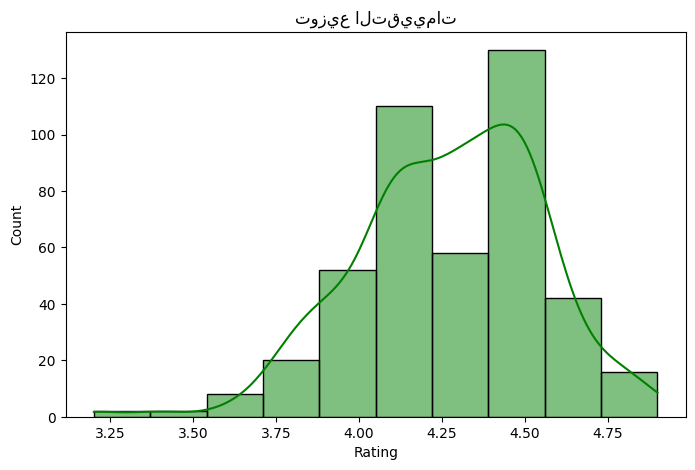

In [12]:
# ÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿ™ŸÇŸäŸäŸÖÿßÿ™ (Rating):
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='green')
plt.title('ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ™ŸÇŸäŸäŸÖÿßÿ™')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

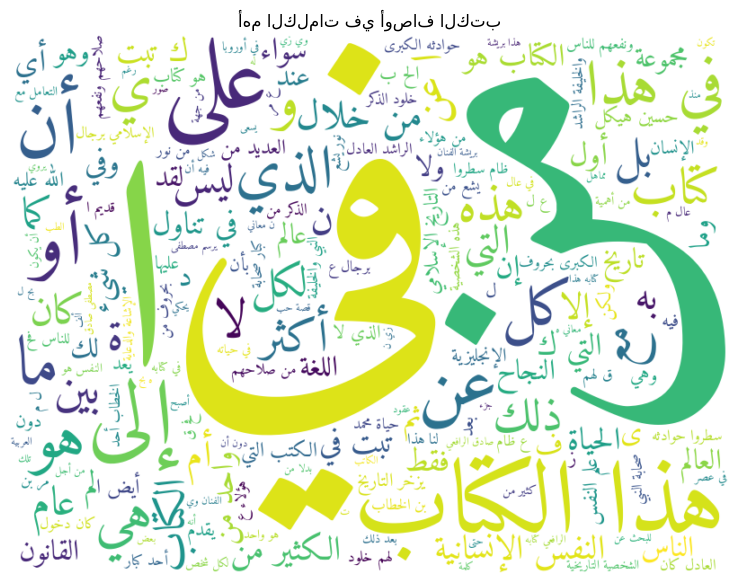

In [13]:
#ÿπÿ±ÿ∂ ÿ£ŸáŸÖ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ŸÅŸä ÿπŸÖŸàÿØ "ÿßŸÑŸàÿµŸÅ" ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ WordCloud
from wordcloud import WordCloud

text = ' '.join(data['Description'].dropna().tolist())

# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿÆÿ∑ ÿßŸÑÿπÿ±ÿ®Ÿä
wordcloud = WordCloud(
    font_path='/content/Amiri-Regular.ttf',
    background_color='white',
    width=800,
    height=600
).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("ÿ£ŸáŸÖ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ŸÅŸä ÿ£ŸàÿµÿßŸÅ ÿßŸÑŸÉÿ™ÿ®")
plt.show()

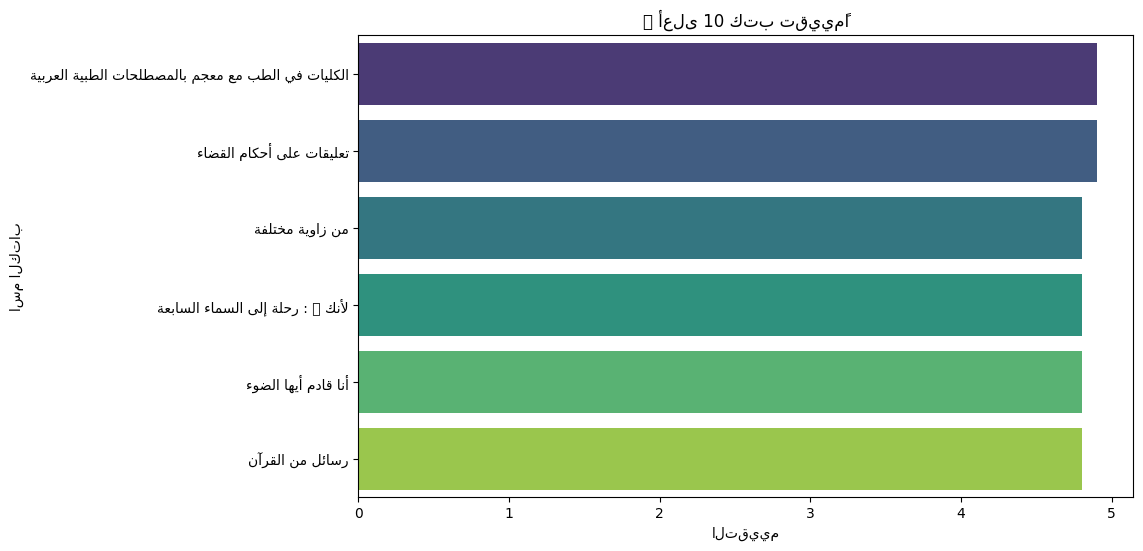

In [15]:
#ÿ£ÿπŸÑŸâ ÿßŸÑŸÉÿ™ÿ® ÿ™ŸÇŸäŸäŸÖŸãÿß:
top_books = data.sort_values(by="Rating", ascending=False).head(10)
plt.figure(figsize=(10, 6))
titles = [get_display(arabic_reshaper.reshape(t)) for t in top_books['BookBadge_Title']]
sns.barplot(y=titles, x=top_books["Rating"], palette="viridis")
plt.title("üîù ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ÿ™ŸÇŸäŸäŸÖŸãÿß")
plt.xlabel("ÿßŸÑÿ™ŸÇŸäŸäŸÖ")
plt.ylabel("ÿßÿ≥ŸÖ ÿßŸÑŸÉÿ™ÿßÿ®")
plt.show()

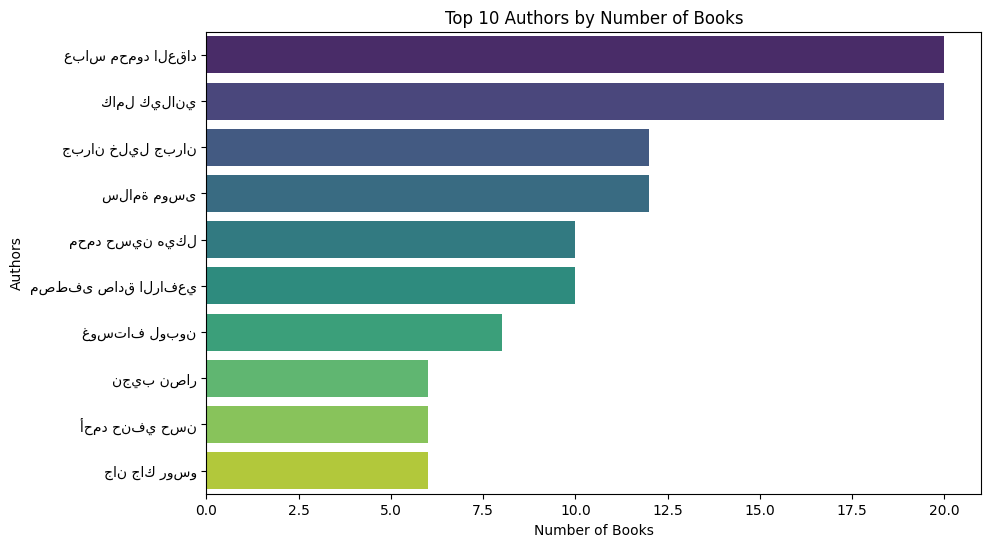

In [16]:
## Top authors by number of books
plt.figure(figsize=(10,6))
top_authors = data['Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.show()

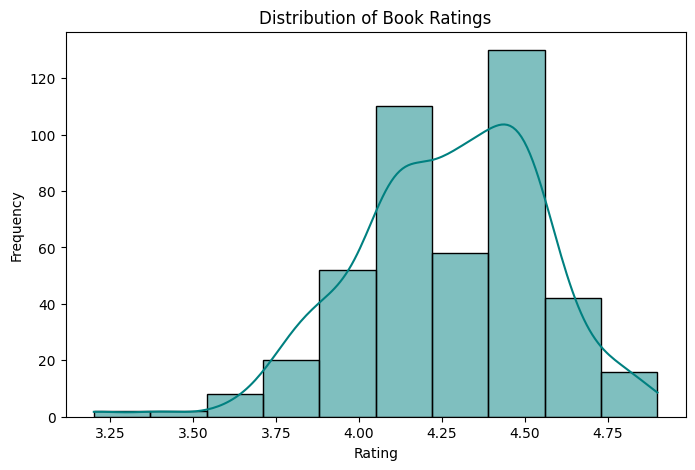

In [17]:
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Rating'], bins=10, kde=True, color='teal')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

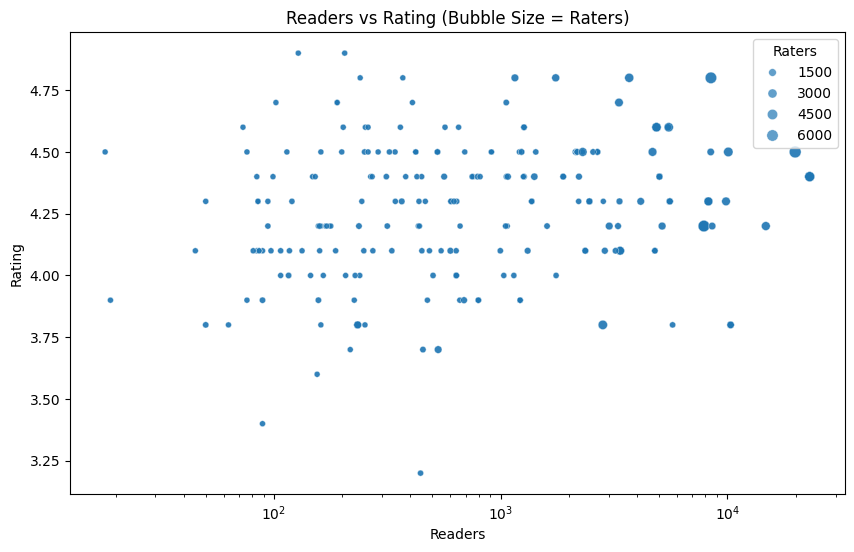

In [18]:
# Scatter plot: Readers vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Readers', y='Rating', size='Raters', data=data, alpha=0.7)
plt.title("Readers vs Rating (Bubble Size = Raters)")
plt.xscale("log")
plt.show()

In [23]:
# ÿ•ÿπÿßÿØÿ© ÿ™ÿ¥ŸÉŸäŸÑ ÿßŸÑŸÜÿµ ÿßŸÑÿπÿ±ÿ®Ÿä ŸÑÿπÿ±ÿ∂Ÿá ÿ®ÿ¥ŸÉŸÑ ÿµÿ≠Ÿäÿ≠
data['Title_AR'] = data['BookBadge_Title'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

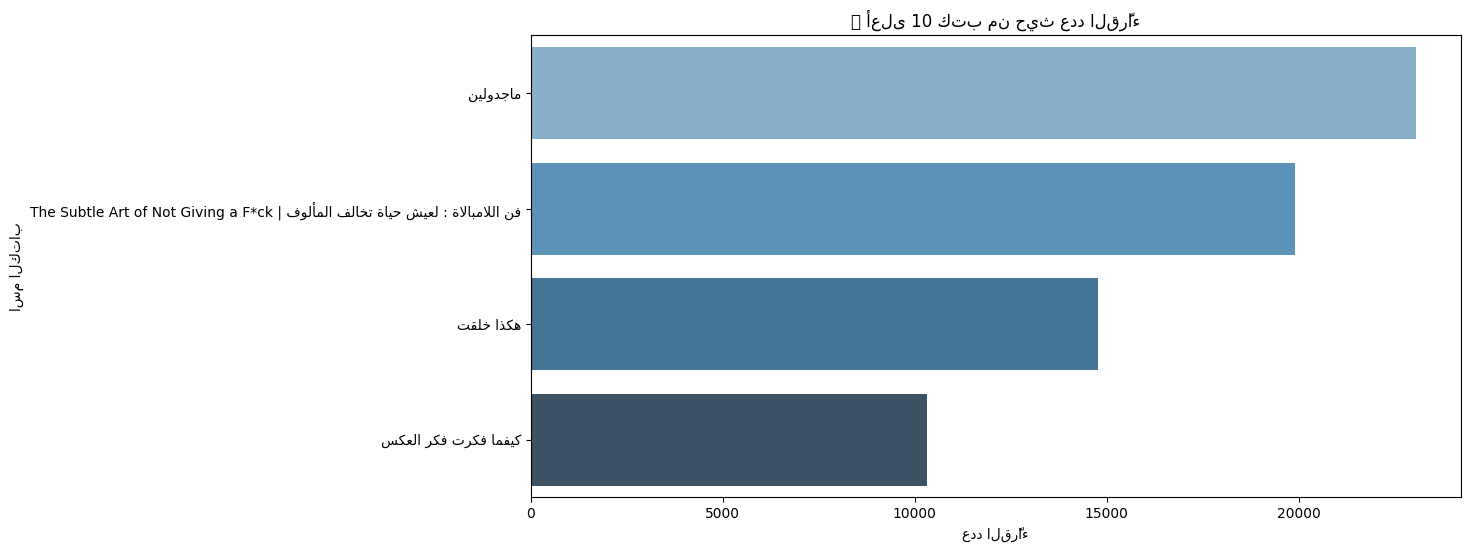

In [24]:
# ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑŸÇÿ±Ÿëÿßÿ° (Readers)
top_readers = data.sort_values(by="Readers", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Readers", y="Title_AR", data=top_readers, palette="Blues_d")
plt.title("üìö ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑŸÇÿ±Ÿëÿßÿ°")
plt.xlabel("ÿπÿØÿØ ÿßŸÑŸÇÿ±Ÿëÿßÿ°")
plt.ylabel("ÿßÿ≥ŸÖ ÿßŸÑŸÉÿ™ÿßÿ®")
plt.show()

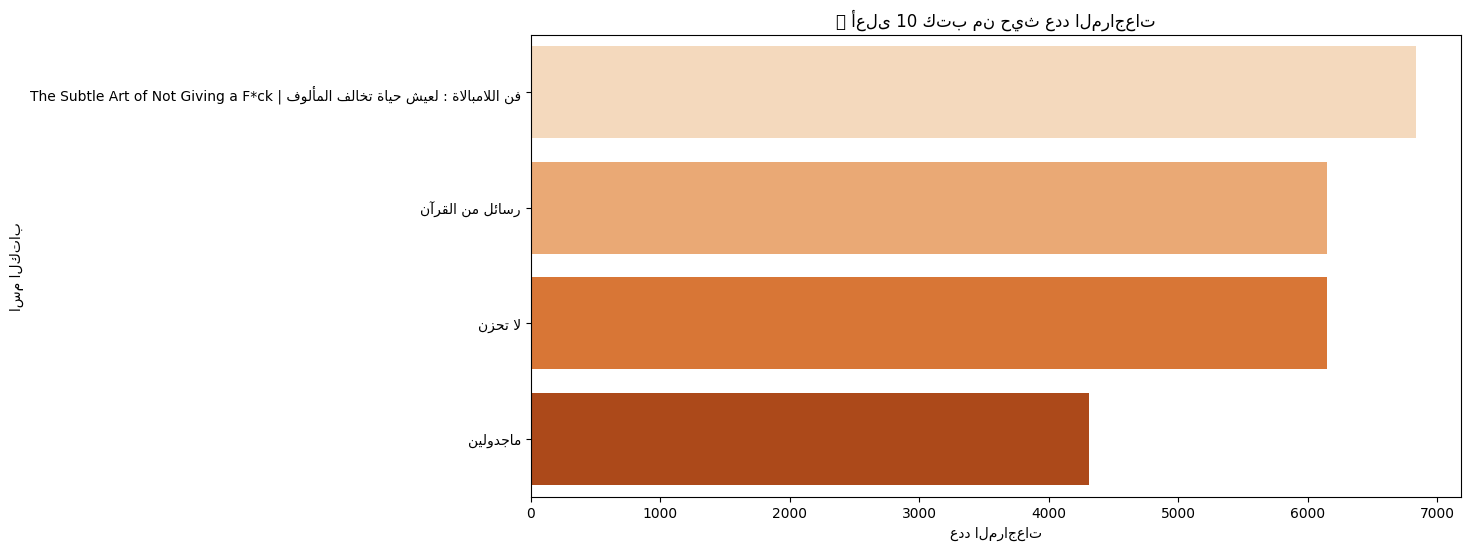

In [25]:
#ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™ (Reviews)
top_reviews = data.sort_values(by="Reviews", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Reviews", y="Title_AR", data=top_reviews, palette="Oranges")
plt.title("üìù ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™")
plt.xlabel("ÿπÿØÿØ ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™")
plt.ylabel("ÿßÿ≥ŸÖ ÿßŸÑŸÉÿ™ÿßÿ®")
plt.show()


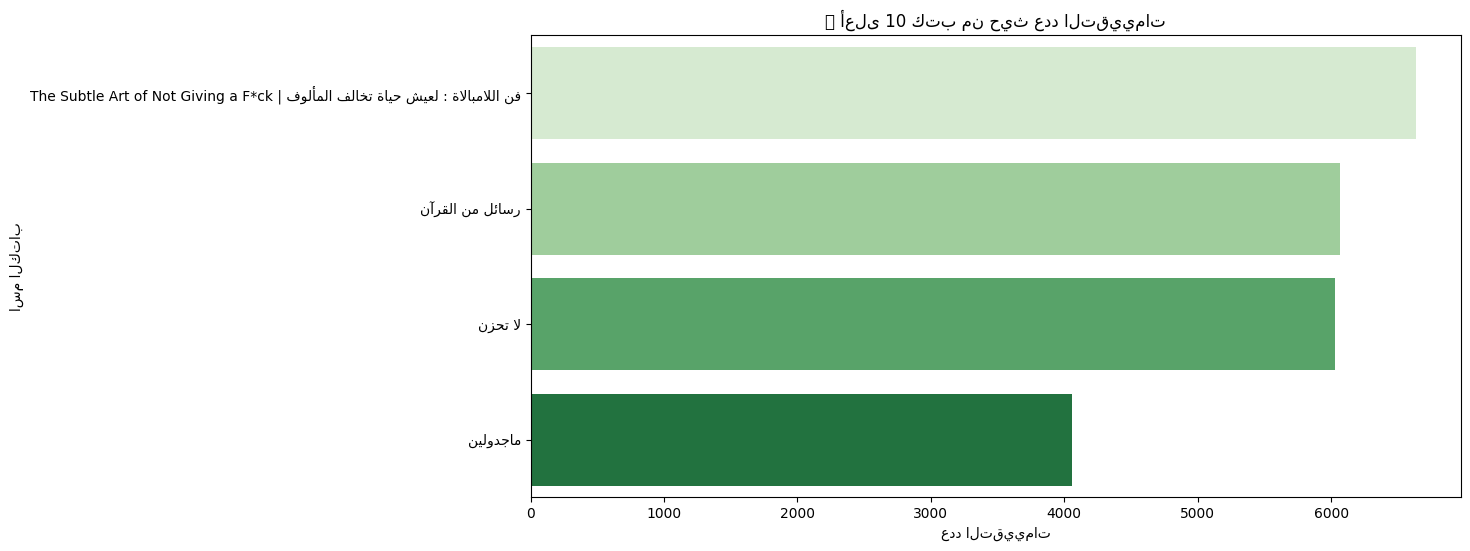

In [26]:
#ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑŸÖŸÇŸäŸÖŸäŸÜ (Raters)
top_raters = data.sort_values(by="Raters", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Raters", y="Title_AR", data=top_raters, palette="Greens")
plt.title("‚≠ê ÿ£ÿπŸÑŸâ 10 ŸÉÿ™ÿ® ŸÖŸÜ ÿ≠Ÿäÿ´ ÿπÿØÿØ ÿßŸÑÿ™ŸÇŸäŸäŸÖÿßÿ™")
plt.xlabel("ÿπÿØÿØ ÿßŸÑÿ™ŸÇŸäŸäŸÖÿßÿ™")
plt.ylabel("ÿßÿ≥ŸÖ ÿßŸÑŸÉÿ™ÿßÿ®")
plt.show()

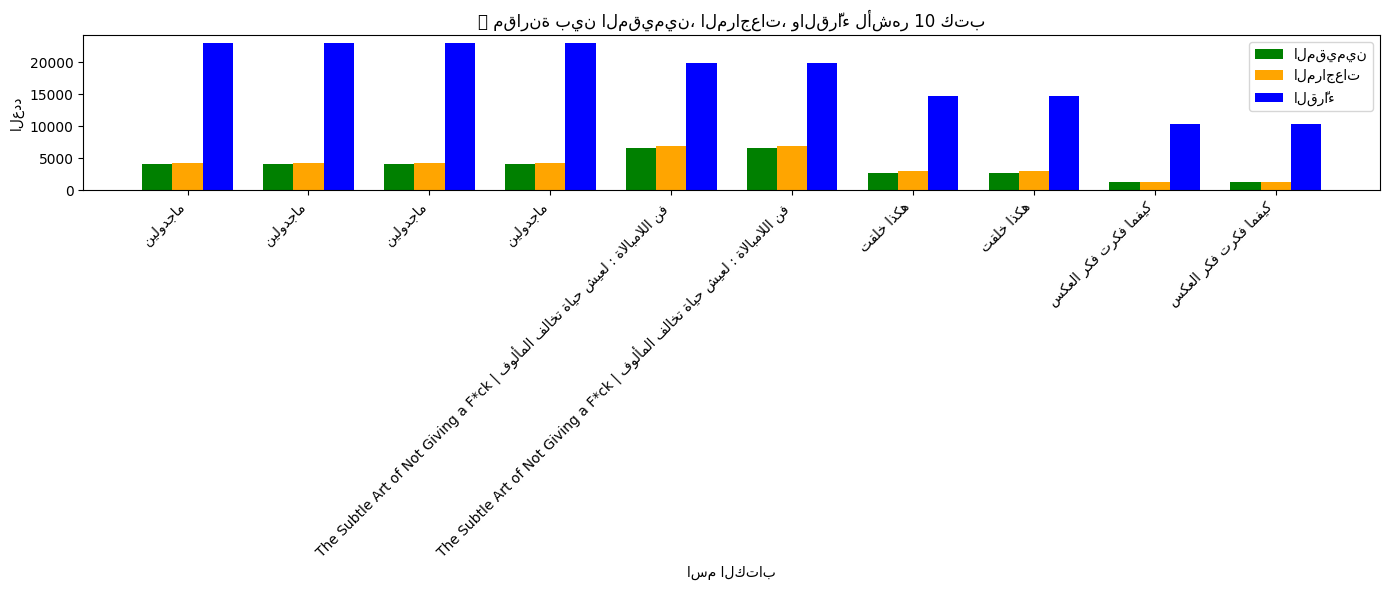

In [27]:
top_combined = data.sort_values(by="Readers", ascending=False).head(10)

plt.figure(figsize=(14, 6))
x = top_combined['Title_AR']

bar_width = 0.25
index = range(len(x))

plt.bar(index, top_combined['Raters'], bar_width, label='ÿßŸÑŸÖŸÇŸäŸÖŸäŸÜ', color='green')
plt.bar([i + bar_width for i in index], top_combined['Reviews'], bar_width, label='ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™', color='orange')
plt.bar([i + bar_width * 2 for i in index], top_combined['Readers'], bar_width, label='ÿßŸÑŸÇÿ±Ÿëÿßÿ°', color='blue')

plt.xlabel('ÿßÿ≥ŸÖ ÿßŸÑŸÉÿ™ÿßÿ®')
plt.ylabel('ÿßŸÑÿπÿØÿØ')
plt.title('üìö ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖŸÇŸäŸÖŸäŸÜÿå ÿßŸÑŸÖÿ±ÿßÿ¨ÿπÿßÿ™ÿå ŸàÿßŸÑŸÇÿ±Ÿëÿßÿ° ŸÑÿ£ÿ¥Ÿáÿ± 10 ŸÉÿ™ÿ®')
plt.xticks([i + bar_width for i in index], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# def preprocess_text(text):
#     # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ±ŸÖŸàÿ≤ ŸàÿßŸÑÿ£ÿ±ŸÇÿßŸÖ
#     text = re.sub(r'[^\u0621-\u064A\s]', '', str(text))
#     text = re.sub(r'\d+', '', text)
#     # ÿ™ÿ≠ŸàŸäŸÑ ŸÑŸÑÿ≠ÿ±ŸàŸÅ ÿßŸÑÿµÿ∫Ÿäÿ±ÿ©
#     text = text.strip()
#     return text
# data['Clean_Description'] = data['Description'].apply(preprocess_text)

In [33]:
!pip install tashaphyne

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 251.5/251.5 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.4/126.4 kB 11.5 MB/s eta 0:00:00


In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tashaphyne.stemming import ArabicLightStemmer
# Define Arabic stopwords
ar_stopwords = set(stopwords.words('arabic'))

# Initialize stemmer
stemmer = ArabicLightStemmer()

# Clean and preprocess function
def preprocess_arabic(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # Normalize characters (optional)
    text = text.replace('ÿ£', 'ÿß').replace('ÿ•', 'ÿß').replace('ÿ¢', 'ÿß')
    text = text.replace('ÿ©', 'Ÿá').replace('Ÿâ', 'Ÿä').replace('ÿ§', 'ÿ°').replace('ÿ¶', 'ÿ°')
    # Tokenize
    words = text.split()
    # Remove stopwords and short words
    words = [word for word in words if word not in ar_stopwords and len(word) > 2]
    # Stemming
    words = [stemmer.light_stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
data['Cleaned_Description'] = data['Description'].apply(lambda x: preprocess_arabic(str(x)))

# Show sample cleaned output
print("\nSample cleaned description:\n", data['Cleaned_Description'].iloc[0])

# Optional: Save cleaned data
data.to_csv("Abjad_books_cleaned.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample cleaned description:
 ÿπÿ±ŸÅ ÿ≠ÿ® ÿ¨Ÿá ÿßŸÑŸäŸÅ ŸÜÿ≠ÿ®ÿå ÿßŸÖŸÉÿßŸÜ ÿÆŸäŸÑ ÿ≠ÿ® ÿ≥ŸÑÿßÿ≠ÿß ŸÇÿ∂Ÿä ÿπŸÑŸâ ÿßŸÖÿßŸÑŸÜÿßÿå ÿ±ÿ®ŸÖÿß ÿπŸÑŸâ ÿ≠Ÿäÿß ÿßŸäÿ∂ÿßÿü ÿπÿ™ÿ®ÿ± ŸÖÿßÿ¨ÿØŸàŸÑ ÿ±Ÿàÿßÿ°ÿπ ÿπŸÖÿßŸÑ ŸÖÿµÿ∑ŸÅ ÿ∑ŸÅ ŸÖŸÜŸÅŸÑŸàÿ∑ ÿ®ÿ±ÿ≤ ÿπŸÖÿßŸÑ


In [38]:
data_cleaned = pd.read_csv('/content/Abjad_books_cleaned.csv')

In [39]:
data_cleaned.head()

BookBadge_Title                Author  Rating  \
0              ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ  ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä     4.4   
1            ŸáŸÉÿ∞ÿß ÿÆŸèŸÑŸÇÿ™        ŸÖÿ≠ŸÖÿØ ÿ≠ÿ≥ŸäŸÜ ŸáŸäŸÉŸÑ     4.2   
2  ŸÇŸàÿßÿπÿØ ÿßŸÑÿπÿ¥ŸÇ ÿßŸÑÿ£ÿ±ÿ®ÿπŸàŸÜ           ÿ•ŸÑŸäŸÅ  ÿ¥ÿßŸÅÿßŸÇ     4.3   
3    ŸÅŸä ŸÇŸÑÿ®Ÿä ÿ£ŸÜÿ´Ÿâ ÿπÿ®ÿ±Ÿäÿ©             ÿÆŸàŸÑÿ© ÿ≠ŸÖÿØŸä     4.5   
4      ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©      ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ     4.3   

                                         Description  Raters  Reviews  \
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...    4057     4313   
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...    2701     2944   
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...    2643     2777   
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...    3405     3518   
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...    2478     2635   

   Readers                                               Link  \
0    23055  https://www.abjjad.com/book/15445318/%D9%85%D8...   
1    14769  https://www.abjjad.com/book/2019491840/%D9%87%...   
2     8242  https://www.abjjad.com/book/2138898432/%D9%82%...   
3    10091  https://www.abjjad.com/book/2073100288/%D9%81%...   
4     9857  https://www.abjjad.com/book/15445260/%D8%A7%D9...   

              Title_AR                                  Clean_Description  \
0             Ôª¶Ôª¥ÔªüÔª≠Ô∫™Ô∫üÔ∫éÔª£  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠ÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜÿ≠ÿ® ŸÑŸÉŸÜ Ÿá...   
1            Ô∫ñÔªòÔª†Ô∫ß Ô∫çÔ∫¨ÔªúÔª´  ÿ±ŸàÿßŸäÿ© ŸàÿßŸÇÿπŸäÿ© ÿ™ÿ±ŸÉÿ™Ÿáÿß ÿ®ŸäŸÜ ŸäÿØŸä ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ© ÿ∫ÿ±Ÿäÿ®ÿ©...   
2  Ôª•ÔªÆÔªåÔ∫ëÔ∫≠Ôª∑Ô∫ç ÔªñÔ∫∏ÔªåÔªüÔ∫ç Ô∫™ÔªãÔ∫çÔªÆÔªó  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ© ÿ•ŸäŸÑÿß ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ© ÿ≥ŸÜ ÿßŸÑÿ£ÿ±ÿ®...   
3   Ô∫îÔª≥Ô∫ÆÔ∫íÔªã Ôª∞Ô∫úÔªßÔ∫É Ôª≤Ô∫íÔª†Ôªó Ôª≤Ôªì  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...   
4      Ô∫ìÔ∫©Ô∫ÆÔª§Ô∫òÔª§ÔªüÔ∫ç Ô∫°Ô∫çÔª≠Ô∫≠Ôª∑Ô∫ç  ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ© ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ©...   

                                 Cleaned_Description  
0  ÿπÿ±ŸÅ ÿ≠ÿ® ÿ¨Ÿá ÿßŸÑŸäŸÅ ŸÜÿ≠ÿ®ÿå ÿßŸÖŸÉÿßŸÜ ÿÆŸäŸÑ ÿ≠ÿ® ÿ≥ŸÑÿßÿ≠ÿß ŸÇÿ∂Ÿä ÿπŸÑŸâ...  
1  ÿ±ŸàÿßŸäŸá ÿßŸÇÿπŸäŸá ÿ™ÿ±ŸÉÿ™Ÿáÿß ÿØŸä ŸÖÿ°ŸÑŸÅ ŸÖÿ±ÿßŸá ÿ∫ÿ±Ÿäÿ®Ÿá ÿ∫ÿßŸÖÿ∂Ÿáÿå ÿ±...  
2  ŸÑÿ∫ÿ™ ÿ∑ŸÑ ÿ±ŸàÿßŸäŸáÿå ŸäŸÑÿß ÿ≤Ÿàÿ¨Ÿá ÿ™ÿπŸäÿ≥Ÿáÿå ÿ≥ŸÜ ÿßÿ±ÿ®ÿπ ÿπŸÜÿØŸÖ ŸÇÿ± ...  
3  ŸÇŸÑÿ® ÿ≠ÿßÿ± ŸäŸáŸàÿØ ÿ¨ŸÜŸàÿ® ÿ™ŸàŸÜÿ≥ ÿ™ÿ¥ÿßÿ® ÿßÿ≠ÿØÿßÿ´ ÿ≠ŸàŸÑ ŸÖÿ≥ŸÑŸÖŸá Ÿäÿ™...  
4  ÿßÿ±Ÿàÿßÿ≠ ŸÖÿ™ŸÖÿ±ÿØŸá ÿ™ÿßÿ® ÿµÿØÿ± ÿßŸàŸÑ ŸÖÿ± ŸÖÿØŸä ŸÜŸäŸàŸäŸàÿ± ÿπÿßŸÖ Ÿ°Ÿ©Ÿ†...

In [40]:
data_cleaned['Rating'].value_counts()

Rating
4.5    72
4.1    62
4.3    58
4.4    58
4.2    48
4.6    30
4.0    26
3.9    26
3.8    20
4.7    12
4.8    12
3.7     6
4.9     4
3.6     2
3.2     2
3.4     2
Name: count, dtype: int64

In [99]:
# ÿπÿ±ÿ∂ ÿ£ŸàŸÑ 10 ŸàÿµŸÅŸàÿµ ŸÖÿπ ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿÆÿßÿµ ÿ®Ÿáÿß
data[['Description', 'Rating']].head(10)

Description  Rating
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...     4.4
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...     4.2
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...     4.3
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...     4.5
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...     4.3
5  "ÿßŸÑÿÆŸäŸÖŸäÿßÿ¶Ÿä" ÿ±ŸàÿßŸäÿ© ÿ¨ÿπŸÑÿ™ ŸÉÿßÿ™ÿ®Ÿáÿß ŸÖŸÜ ÿ£ÿ¥Ÿáÿ± ÿßŸÑŸÉÿ™Ÿëÿßÿ® ...     4.1
6  ŸÑŸÖ ÿ£ÿ±Ÿé ŸÖŸÜ ŸÇÿ®ŸÑ ÿÆŸàŸÅ Ÿàÿ¨ŸàŸá ÿ£ŸáŸÑ ÿ≤ŸäŸÉŸàŸÑÿß ŸÖÿ´ŸÑŸÖÿß ŸÉŸÜÿ™ ÿ£ÿ±...     4.7
7  ÿßŸÑÿ¨ÿ®ŸÑÿßŸàŸä ŸáŸà ÿ±ÿ¨ŸÑ ŸäÿπŸäÿ¥ ŸÅŸä ÿµÿ≠ÿ±ÿßÿ° ÿßŸÑŸÖŸÇÿ∑ŸÖÿå ŸÅŸä ÿ¥ÿßÿ±ÿπ ...     3.8
8  Ÿäÿ±ŸàŸä ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ®ÿå ŸÇÿµÿ© ÿ≠ÿ® ÿ±Ÿà...     4.2
9  "ÿ•ŸÜŸë ÿ¥ŸÖÿ≥ÿßŸã ÿ™ÿ¥ÿ±ŸÇ Ÿàÿ™ÿ∫ÿ±ÿ® ÿØŸàŸÜ ÿ£ŸÜ ÿ™Ÿèÿ±ŸäŸÜŸä ÿ•ŸäÿßŸáÿßÿå ŸáŸä ...     4.5

In [41]:
#  ÿ•ÿπÿØÿßÿØ ÿßŸÑÿπŸÖŸàÿØ ÿßŸÑŸáÿØŸÅ (Rating Category)
def classify_rating(r):
    if r >= 4.4:
        return "High"
    elif r >= 4.1:
        return "Medium"
    else:
        return "Low"

data_cleaned["Rating_Class"] = data_cleaned["Rating"].apply(classify_rating)

In [102]:
data_cleaned[['Description', 'Rating', 'Rating_Class']].head(10)

Description  Rating  Rating_Class
0  ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑ...     4.4             0
1  ÿ±ŸàÿßŸäÿ©Ÿå ŸàÿßŸÇÿπŸäÿ©Ÿå ÿ™ÿ±ŸÉŸéÿ™ŸíŸáÿß ÿ®ŸäŸÜ ŸäÿØŸéŸäŸê ÿßŸÑŸÖÿ§ŸÑŸÅ ÿßŸÖÿ±ÿ£ÿ©...     4.2             2
2  ÿ®ŸÑÿ∫ÿ™ ÿ®ÿ∑ŸÑÿ© ÿßŸÑÿ±ŸàÿßŸäÿ©ÿå ÿ•ŸäŸÑÿßŸë ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ™ÿπŸäÿ≥ÿ©ÿå ÿ≥ŸÜŸë ÿß...     4.3             2
3  ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑ...     4.5             0
4  ¬´ÿßŸÑÿ£ÿ±Ÿàÿßÿ≠ ÿßŸÑŸÖÿ™ŸÖÿ±ÿØÿ©¬ª ŸáŸà ŸÉÿ™ÿßÿ® ÿµÿØÿ± ŸÑÿ£ŸàŸÑ ŸÖÿ±ÿ© ŸÅŸä ŸÖÿØŸä...     4.3             2
5  "ÿßŸÑÿÆŸäŸÖŸäÿßÿ¶Ÿä" ÿ±ŸàÿßŸäÿ© ÿ¨ÿπŸÑÿ™ ŸÉÿßÿ™ÿ®Ÿáÿß ŸÖŸÜ ÿ£ÿ¥Ÿáÿ± ÿßŸÑŸÉÿ™Ÿëÿßÿ® ...     4.1             2
6  ŸÑŸÖ ÿ£ÿ±Ÿé ŸÖŸÜ ŸÇÿ®ŸÑ ÿÆŸàŸÅ Ÿàÿ¨ŸàŸá ÿ£ŸáŸÑ ÿ≤ŸäŸÉŸàŸÑÿß ŸÖÿ´ŸÑŸÖÿß ŸÉŸÜÿ™ ÿ£ÿ±...     4.7             0
7  ÿßŸÑÿ¨ÿ®ŸÑÿßŸàŸä ŸáŸà ÿ±ÿ¨ŸÑ ŸäÿπŸäÿ¥ ŸÅŸä ÿµÿ≠ÿ±ÿßÿ° ÿßŸÑŸÖŸÇÿ∑ŸÖÿå ŸÅŸä ÿ¥ÿßÿ±ÿπ ...     3.8             1
8  Ÿäÿ±ŸàŸä ÿ¨ÿ®ÿ±ÿßŸÜ ÿÆŸÑŸäŸÑ ÿ¨ÿ®ÿ±ÿßŸÜ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÉÿ™ÿßÿ®ÿå ŸÇÿµÿ© ÿ≠ÿ® ÿ±Ÿà...     4.2             2
9  "ÿ•ŸÜŸë ÿ¥ŸÖÿ≥ÿßŸã ÿ™ÿ¥ÿ±ŸÇ Ÿàÿ™ÿ∫ÿ±ÿ® ÿØŸàŸÜ ÿ£ŸÜ ÿ™Ÿèÿ±ŸäŸÜŸä ÿ•ŸäÿßŸáÿßÿå ŸáŸä ...     4.5             0

In [103]:
for category in data_cleaned['Rating_Class'].unique():
    print(f"\n===== ÿ£ŸÖÿ´ŸÑÿ© ŸÑŸÅÿ¶ÿ© {category} =====")
    print(data_cleaned[data_cleaned['Rating_Class'] == category][['Description', 'Rating']].head(3).to_string(index=False))


===== ÿ£ŸÖÿ´ŸÑÿ© ŸÑŸÅÿ¶ÿ© 0 =====
                                                                                                                                                                                                 Description  Rating
ŸÑÿß ŸÜÿπÿ±ŸÅ ÿπŸÜ ÿßŸÑÿ≠Ÿèÿ® ÿ∫Ÿäÿ± Ÿàÿ¨ŸáŸá ÿßŸÑÿ£ŸÑŸäŸÅ ÿßŸÑÿ∞Ÿä ŸÜŸèÿ≠Ÿêÿ®ÿå ŸÑŸÉŸÜ ŸáŸÑ ÿ®ÿ•ŸÖŸÉÿßŸÜŸÉ ÿ™ÿÆŸäŸëŸÑ ÿßŸÑÿ≠Ÿèÿ® ÿ≥ŸÑÿßÿ≠ÿßŸã ŸäŸÇÿ∂Ÿä ÿπŸÑŸâ ÿ¢ŸÖÿßŸÑŸÜÿßÿå Ÿàÿ±Ÿèÿ®ŸÖÿß ÿπŸÑŸâ ÿ≠Ÿäÿßÿ™ŸÜÿß ÿ£Ÿäÿ∂ÿßŸãÿü.\nÿ™Ÿèÿπÿ™ÿ®ÿ± ŸÖÿßÿ¨ÿØŸàŸÑŸäŸÜ ŸÖŸÜ ÿ±Ÿàÿßÿ¶ÿπ ÿ£ÿπŸÖÿßŸÑ ŸÖÿµÿ∑ŸÅŸâ ŸÑÿ∑ŸÅŸä ÿßŸÑŸÖŸÜŸÅŸÑŸàÿ∑Ÿä ŸàŸÖŸÜ ÿ£ÿ®ÿ±ÿ≤ ÿ£ÿπŸÖÿßŸÑŸá ÿßŸÑÿ™Ÿä ŸÖÿß ÿ≤ÿß...     4.4
 ŸÅŸä ŸÇŸÑÿ® ÿ≠ÿßÿ±ÿ© ÿßŸÑŸäŸáŸàÿØ ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä ÿ™ÿ™ÿ¥ÿßÿ®ŸÉ ÿßŸÑÿ£ÿ≠ÿØÿßÿ´ ÿ≠ŸàŸÑ ÿßŸÑŸÖÿ≥ŸÑŸÖÿ© ÿßŸÑŸäÿ™ŸäŸÖÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ±ÿ®ÿ™ ÿ®ŸäŸÜ ÿ£ÿ≠ÿ∂ÿßŸÜ ÿπÿßÿ¶ŸÑÿ© ŸäŸáŸàÿØŸäÿ©ÿå Ÿà ÿ®ŸäŸÜ ÿ´ŸÜÿßŸäÿß ŸÖÿØŸäŸÜÿ© ŸÇÿßŸÜÿß ÿßŸÑÿπÿ™ŸäŸÇÿ© ŸÅŸä ÿßŸÑÿ¨ŸÜŸàÿ® ÿßŸÑŸÑÿ®ŸÜÿßŸÜŸä ÿ™ÿØÿÆŸÑ ÿ®ŸÑÿ®ŸÑÿ© ÿ∫Ÿäÿ± ŸÖÿ™ŸàŸÇÿπÿ© ŸÅŸä ÿ≠Ÿäÿßÿ© ŸÜÿØŸâ ÿßŸÑÿ™Ÿä ŸÜÿ¥ÿ£ÿ™ ...     4.

In [42]:
from sklearn.model_selection import train_test_split

X = data_cleaned['Clean_Description']
y = data_cleaned['Rating_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ÿßŸÑÿØŸÇÿ©:", accuracy_score(y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

        High       0.88      0.95      0.91        38
         Low       0.93      0.76      0.84        17
      Medium       0.91      0.91      0.91        33

    accuracy                           0.90        88
   macro avg       0.91      0.87      0.89        88
weighted avg       0.90      0.90      0.90        88

ÿßŸÑÿØŸÇÿ©: 0.8977272727272727

=== Naive Bayes ===
              precision    recall  f1-score   support

        High       0.72      0.95      0.82        38
         Low       0.80      0.24      0.36        17
      Medium       0.82      0.82      0.82        33

    accuracy                           0.76        88
   macro avg       0.78      0.67      0.67        88
weighted avg       0.77      0.76      0.73        88

ÿßŸÑÿØŸÇÿ©: 0.7613636363636364

=== Random Forest ===
              precision    recall  f1-score   support

        High       0.95      1.00      0.97     

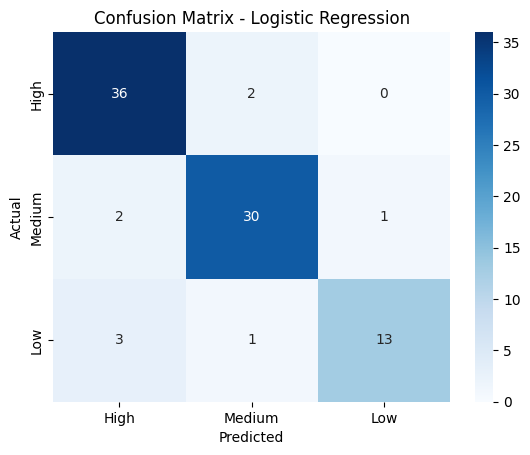

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["High", "Medium", "Low"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Medium", "Low"], yticklabels=["High", "Medium", "Low"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# ŸÖÿ´ÿßŸÑ: ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßŸÑÿ™ÿ®ÿßÿ≥ ŸÑŸÄ Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
plot_cm(y_test, y_pred, "Confusion Matrix - Logistic Regression")

In [50]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÅÿ¶ÿßÿ™ ÿ•ŸÑŸâ ÿ£ÿ±ŸÇÿßŸÖ
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 2. ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()

models = {
    "XGBoost": xgb,
    "LightGBM": lgbm
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train_enc)
    y_pred_enc = model.predict(X_test_tfidf)

    # 3. ÿ•ÿπÿßÿØÿ© ÿßŸÑÿ™ŸàŸÇÿπÿßÿ™ ÿ•ŸÑŸâ ŸÅÿ¶ÿßÿ™ ŸÜÿµŸäÿ©
    y_pred = le.inverse_transform(y_pred_enc)
    y_test_text = le.inverse_transform(y_test_enc)

    acc = accuracy_score(y_test_text, y_pred)
    report = classification_report(y_test_text, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision (High)": round(report["High"]["precision"], 2),
        "Recall (High)": round(report["High"]["recall"], 2),
        "F1-score (High)": round(report["High"]["f1-score"], 2)
    })

    print(f"\n=== {name} ===")
    print(classification_report(y_test_text, y_pred))
    print("ÿßŸÑÿØŸÇÿ©:", accuracy_score(y_test, y_pred))


=== XGBoost ===
              precision    recall  f1-score   support

        High       1.00      0.95      0.97        38
         Low       0.94      1.00      0.97        17
      Medium       0.94      0.97      0.96        33

    accuracy                           0.97        88
   macro avg       0.96      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88

ÿßŸÑÿØŸÇÿ©: 0.9659090909090909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 352, number of used features: 35
[LightGBM] [Info] Start training from score -0.852996
[LightGBM] [Info] Start training from score -1.658939
[LightGBM] [Info] Start training from score -0.958356
[LightGBM] [Warning] No further splits with positive gain, 

In [51]:
print(le.classes_)  # ['High' 'Low' 'Medium']

['High' 'Low' 'Medium']


In [52]:
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision (High)  Recall (High)  F1-score (High)
0   XGBoost     96.59               1.0           0.95             0.97
1  LightGBM     96.59               1.0           0.95             0.97

In [58]:
def preprocess_and_predict(text, model):
    # ŸÜŸÅÿ≥ ÿÆÿ∑Ÿàÿßÿ™ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ≥ÿßÿ®ŸÇÿ©
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)
    return pred[0]

# ŸÖÿ´ÿßŸÑ:
new_description = "ÿ±ŸàÿßŸäÿ© ÿ™ÿ™ÿ≠ÿØÿ´ ÿπŸÜ ŸÅÿ™ÿßÿ© ÿ™ÿ®ÿ≠ÿ´ ÿπŸÜ ÿ∞ÿßÿ™Ÿáÿß ŸÅŸä ÿπÿßŸÑŸÖ ŸÖÿ∂ÿ∑ÿ±ÿ® ŸÖŸÑŸäÿ° ÿ®ÿßŸÑÿµÿ±ÿßÿπÿßÿ™ ÿ®ŸäŸÜ ÿßŸÑŸÇŸÑÿ® ŸàÿßŸÑÿπŸÇŸÑ"
prediction = preprocess_and_predict(new_description, lgbm)

print("üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸÑŸÑŸàÿµŸÅ ÿßŸÑÿ¨ÿØŸäÿØ:", prediction)

üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸÑŸÑŸàÿµŸÅ ÿßŸÑÿ¨ÿØŸäÿØ: 2


In [61]:
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision (High)": round(report["High"]["precision"], 2),
        "Recall (High)": round(report["High"]["recall"], 2),
        "F1-score (High)": round(report["High"]["f1-score"], 2)
    })

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ÿßŸÑÿØŸÇÿ©:", round(acc * 100, 2))


=== Logistic Regression ===
              precision    recall  f1-score   support

        High       0.88      0.95      0.91        38
         Low       0.93      0.76      0.84        17
      Medium       0.91      0.91      0.91        33

    accuracy                           0.90        88
   macro avg       0.91      0.87      0.89        88
weighted avg       0.90      0.90      0.90        88

ÿßŸÑÿØŸÇÿ©: 89.77

=== Naive Bayes ===
              precision    recall  f1-score   support

        High       0.72      0.95      0.82        38
         Low       0.80      0.24      0.36        17
      Medium       0.82      0.82      0.82        33

    accuracy                           0.76        88
   macro avg       0.78      0.67      0.67        88
weighted avg       0.77      0.76      0.73        88

ÿßŸÑÿØŸÇÿ©: 76.14

=== Random Forest ===
              precision    recall  f1-score   support

        High       0.95      1.00      0.97        38
         Low       0

In [62]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False)

Model  Accuracy  Precision (High)  Recall (High)  \
2        Random Forest     96.59              0.95           1.00   
0  Logistic Regression     89.77              0.88           0.95   
1          Naive Bayes     76.14              0.72           0.95   

   F1-score (High)  
2             0.97  
0             0.91  
1             0.82

In [63]:
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print("‚úÖ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨ ŸáŸà:", best_model_name)

‚úÖ ÿ£ŸÅÿ∂ŸÑ ŸÜŸÖŸàÿ∞ÿ¨ ŸáŸà: Random Forest


In [64]:
def preprocess_and_predict(text, model):
    # ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖÿ≥ÿ®ŸÇÿ© ŸÉŸÖÿß ŸÅŸä ÿßŸÑÿ≥ÿßÿ®ŸÇ
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)
    return pred[0]

# ŸÖÿ´ÿßŸÑ:
new_text = "ŸÇÿµÿ© ŸÅÿ™ÿßÿ© ÿ™ÿ®ÿ≠ÿ´ ÿπŸÜ ÿ∞ÿßÿ™Ÿáÿß ŸÅŸä ÿπÿßŸÑŸÖ ŸÖŸÑŸäÿ° ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿßÿ™ ÿßŸÑŸÜŸÅÿ≥Ÿäÿ© ŸàÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ©"
prediction = preprocess_and_predict(new_text, best_model)
print("üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ:", prediction)

üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ: High


In [ ]:
# ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÉÿ™ÿ® ÿ≠ÿ≥ÿ® ÿßŸÑŸÖÿ§ŸÑŸÅ
# ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÉÿ™ÿ® ÿ≠ÿ≥ÿ® ÿßŸÑÿ™ŸÇŸäŸäŸÖ (ÿπÿßŸÑŸä / ŸÖÿ™Ÿàÿ≥ÿ∑ / ŸÖŸÜÿÆŸÅÿ∂)
# ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÉÿ™ÿ® ÿ≠ÿ≥ÿ® ŸÜŸàÿπ ÿßŸÑŸÇÿµÿ© (ÿ±ŸàŸÖÿßŸÜÿ≥Ÿäÿå ÿ™ÿßÿ±ŸäÿÆŸäÿå ŸÅŸÑÿ≥ŸÅŸäÿå )

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# ÿ™ÿ±ŸÖŸäÿ≤ ÿßŸÑŸÅÿ¶ÿßÿ™
label_encoder = LabelEncoder()
data_cleaned['label'] = label_encoder.fit_transform(data_cleaned['Rating_Class'])  # High, Medium, Low ‚Üí ÿ£ÿ±ŸÇÿßŸÖ

# ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖÿ≥ÿ®ŸÇÿ©
texts = data_cleaned['Clean_Description'].astype(str).tolist()
labels = data_cleaned['label'].values
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, stratify=labels, random_state=42)

In [80]:
max_words = 5000   # ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ©
max_len = 100      # ÿ£ŸÇÿµŸâ ÿ∑ŸàŸÑ ŸÑŸÑÿ¨ŸÖŸÑÿ©

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [91]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # ÿ´ŸÑÿßÿ´ ŸÅÿ¶ÿßÿ™: High, Medium, Low

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_4 (Embedding)         ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 201ms/step - accuracy: 0.3788 - loss: 1.0947 - val_accuracy: 0.5278 - val_loss: 1.0560
Epoch 2/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 149ms/step - accuracy: 0.5558 - loss: 1.0422 - val_accuracy: 0.7222 - val_loss: 0.9496
Epoch 3/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 151ms/step - accuracy: 0.7803 - loss: 0.9090 - val_accuracy: 0.8056 - val_loss: 0.6604
Epoch 4/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 189ms/step - accuracy: 0.8556 - loss: 0.5211 - val_accuracy: 0.8889 - val_loss: 0.3177
Epoch 5/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 148ms/step - accuracy: 0.9912 - loss: 0.2071 - val_accuracy: 0.9444 - val_loss: 0.3384
Epoch 6/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 150ms/step - accuracy: 0.9939 - loss: 0.0756 - val_accuracy: 0.9444 - val_loss:

In [87]:
from sklearn.metrics import classification_report
import numpy as np

# ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# ÿ™ÿ£ŸÉÿØ ÿ£ŸÜ label_encoder ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ®Ÿá ÿπŸÑŸâ ÿßŸÑŸÜÿµŸàÿµ:
label_encoder.fit(["High", "Medium", "Low"])

# ÿ∑ÿ®ÿßÿπÿ© ÿßŸÑÿ™ŸÇÿ±Ÿäÿ± ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑŸÅÿ¶ÿßÿ™ ÿßŸÑŸÜÿµŸäÿ©
target_names = ["High", "Medium", "Low"]
print(classification_report(y_test, y_pred, target_names=target_names))

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
              precision    recall  f1-score   support

        High       1.00      0.82      0.90        38
      Medium       0.65      1.00      0.79        17
         Low       0.90      0.85      0.88        33

    accuracy                           0.86        88
   macro avg       0.85      0.89      0.85        88
weighted avg       0.90      0.86      0.87        88



In [84]:
def predict_new_text_lstm(text):
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = np.argmax(model.predict(pad), axis=1)[0]
    return label_encoder.inverse_transform([pred])[0]

# ŸÖÿ´ÿßŸÑ:
text = "ÿ±ŸàÿßŸäÿ© ÿ±ŸàŸÖÿßŸÜÿ≥Ÿäÿ© ÿ™ÿ™ŸÜÿßŸàŸÑ ŸÖÿπÿßŸÜÿßÿ© ÿßŸÖÿ±ÿ£ÿ© ŸÅŸä ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ŸÖÿ≠ÿßŸÅÿ∏ÿ© ÿ™ÿ®ÿ≠ÿ´ ÿπŸÜ ÿ≠ÿ±Ÿäÿ™Ÿáÿß"
print("üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ:", predict_new_text_lstm(text))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ: 1


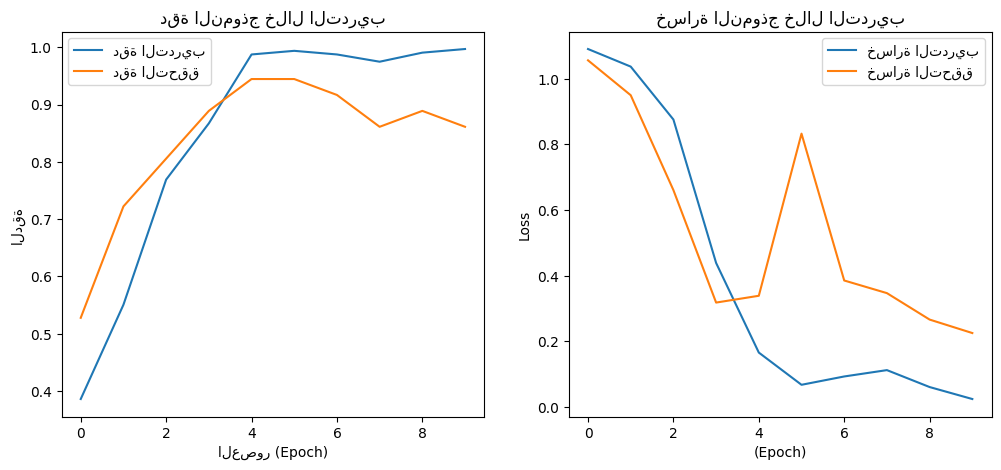

In [89]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿ™ÿ≠ŸÇŸÇ
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.plot(history.history['val_accuracy'], label='ÿØŸÇÿ© ÿßŸÑÿ™ÿ≠ŸÇŸÇ')
    plt.title('ÿØŸÇÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿÆŸÑÿßŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.xlabel('ÿßŸÑÿπÿµŸàÿ± (Epoch)')
    plt.ylabel('ÿßŸÑÿØŸÇÿ©')
    plt.legend()

    # ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿ™ÿ≠ŸÇŸÇ
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.plot(history.history['val_loss'], label='ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿ≠ŸÇŸÇ')
    plt.title('ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿÆŸÑÿßŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.xlabel('(Epoch)')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# ÿßÿ≥ÿ™ÿØÿπŸê ÿßŸÑÿØÿßŸÑÿ© ÿ®ÿπÿØ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
plot_training_history(history)

In [93]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model1 = Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))  # ÿ´ŸÑÿßÿ´ ŸÅÿ¶ÿßÿ™: High, Medium, Low

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_6 (Embedding)         ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_5 (LSTM)                   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
history1 = model1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 193ms/step - accuracy: 0.4193 - loss: 1.0911 - val_accuracy: 0.3611 - val_loss: 1.0620
Epoch 2/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step - accuracy: 0.4481 - loss: 1.0407 - val_accuracy: 0.3611 - val_loss: 0.9798
Epoch 3/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step - accuracy: 0.4986 - loss: 0.9140 - val_accuracy: 0.6111 - val_loss: 0.7911
Epoch 4/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step - accuracy: 0.7585 - loss: 0.6509 - val_accuracy: 0.9167 - val_loss: 0.5967
Epoch 5/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step - accuracy: 0.9582 - loss: 0.4181 - val_accuracy: 0.9167 - val_loss: 0.2997
Epoch 6/10
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 85ms/step - accuracy: 0.9406 - loss: 0.2232 - val_accuracy: 0.9167 - val_loss: 0.22

In [95]:
from sklearn.metrics import classification_report
import numpy as np

# ÿßŸÑÿ™ŸÜÿ®ÿ§
y_pred_prob = model1.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# ÿ™ÿ£ŸÉÿØ ÿ£ŸÜ label_encoder ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ®Ÿá ÿπŸÑŸâ ÿßŸÑŸÜÿµŸàÿµ:
label_encoder.fit(["High", "Medium", "Low"])

# ÿ∑ÿ®ÿßÿπÿ© ÿßŸÑÿ™ŸÇÿ±Ÿäÿ± ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑŸÅÿ¶ÿßÿ™ ÿßŸÑŸÜÿµŸäÿ©
target_names = ["High", "Medium", "Low"]
print(classification_report(y_test, y_pred, target_names=target_names))

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 150ms/step
              precision    recall  f1-score   support

        High       0.94      0.87      0.90        38
      Medium       0.77      1.00      0.87        17
         Low       0.90      0.85      0.88        33

    accuracy                           0.89        88
   macro avg       0.87      0.91      0.88        88
weighted avg       0.90      0.89      0.89        88



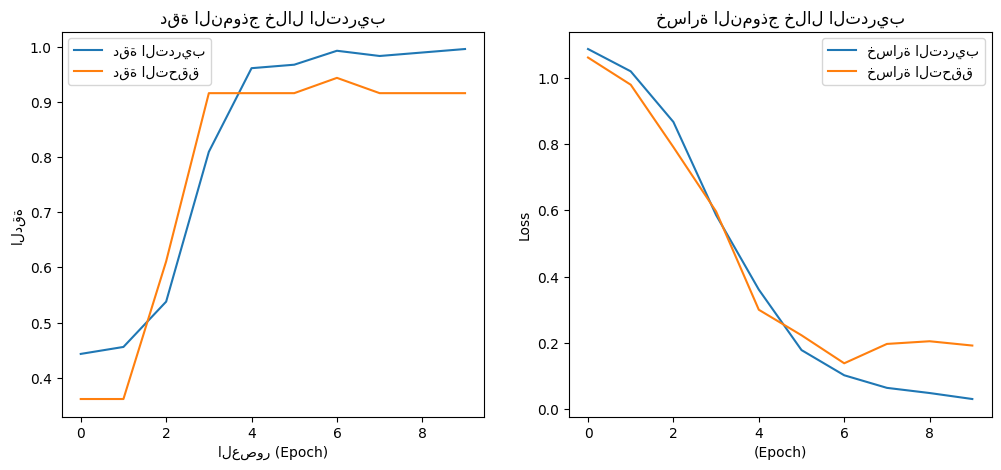

In [96]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿ™ÿ≠ŸÇŸÇ
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.plot(history1.history['val_accuracy'], label='ÿØŸÇÿ© ÿßŸÑÿ™ÿ≠ŸÇŸÇ')
    plt.title('ÿØŸÇÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿÆŸÑÿßŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.xlabel('ÿßŸÑÿπÿµŸàÿ± (Epoch)')
    plt.ylabel('ÿßŸÑÿØŸÇÿ©')
    plt.legend()

    # ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿ™ÿ≠ŸÇŸÇ
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.plot(history1.history['val_loss'], label='ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑÿ™ÿ≠ŸÇŸÇ')
    plt.title('ÿÆÿ≥ÿßÿ±ÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿÆŸÑÿßŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®')
    plt.xlabel('(Epoch)')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# ÿßÿ≥ÿ™ÿØÿπŸê ÿßŸÑÿØÿßŸÑÿ© ÿ®ÿπÿØ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
plot_training_history(history)

In [97]:
def predict_new_text_lstm(text):
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = np.argmax(model1.predict(pad), axis=1)[0]
    return label_encoder.inverse_transform([pred])[0]

# ŸÖÿ´ÿßŸÑ:
text = "ÿ±ŸàÿßŸäÿ© ÿ±ŸàŸÖÿßŸÜÿ≥Ÿäÿ© ÿ™ÿ™ŸÜÿßŸàŸÑ ŸÖÿπÿßŸÜÿßÿ© ÿßŸÖÿ±ÿ£ÿ© ŸÅŸä ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ŸÖÿ≠ÿßŸÅÿ∏ÿ© ÿ™ÿ®ÿ≠ÿ´ ÿπŸÜ ÿ≠ÿ±Ÿäÿ™Ÿáÿß"
print("üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ:", predict_new_text_lstm(text))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 69ms/step
üîÆ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ: Low
